In [40]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Dataset

In [23]:
dataset = pd.read_csv("data/credit_data.csv")

dataset.shape

(2000, 5)

In [24]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [25]:
dataset.dropna(inplace=True)

dataset.shape

(1997, 5)

<Axes: xlabel='c#default', ylabel='count'>

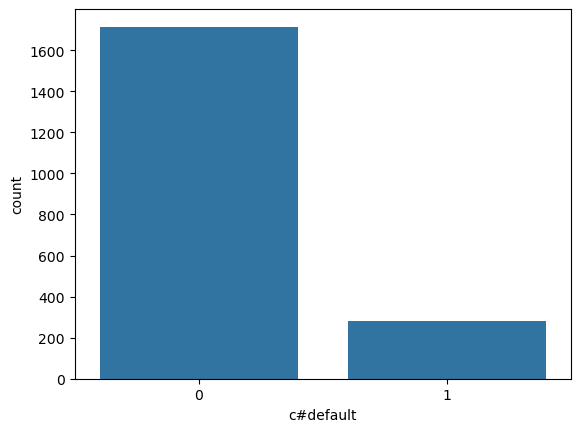

In [26]:
sns.countplot(x="c#default", data=dataset)

In [27]:
X = dataset.iloc[:, 1:4].values

X.shape

(1997, 3)

In [28]:
y = dataset.iloc[:, 4].values

y.shape

(1997,)

# Stratify split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

X_train.shape, y_train.shape

((1597, 3), (1597,))

In [30]:
X_test.shape, y_test.shape

((400, 3), (400,))

In [31]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [32]:
1714 / len(dataset), 283 / len(dataset)

(0.8582874311467201, 0.14171256885327993)

In [33]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [34]:
226 / len(y_train)

0.14151534126487164

In [35]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([343,  57]))

In [36]:
57 / len(y_test)

0.1425

# Naive Bayes Model

In [37]:
model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [38]:
prediction = model.predict(X_test)

prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
accuracy_score(prediction, y_test)

0.9225

In [46]:
cm = confusion_matrix(prediction, y_test)

cm

array([[336,  24],
       [  7,  33]])

<Axes: >

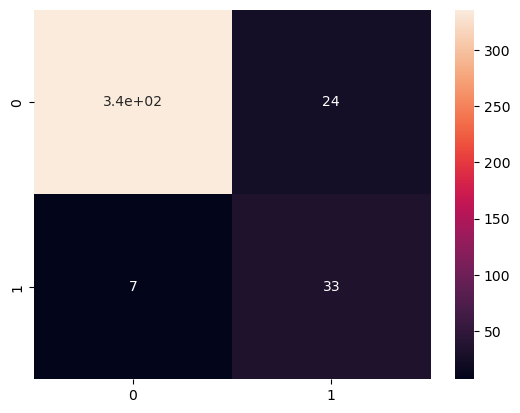

In [47]:
sns.heatmap(cm, annot=True)

In [ ]:
print("Accuracy: ", (cm[0][0] + cm[1][1]) / cm.sum())
print("Precision: ", cm[1][1] / (cm[1][1] + cm[0][1]))
print("Recall: ", cm[1][1] / (cm[1][1] + cm[1][0]))
print("")
print("Payes: ", cm[0][0] / (cm[0][0] + cm[0][1]))
print("No payes: ", cm[1][1] / (cm[1][1] + cm[1][0]))

Accuracy:  0.9225
Precision:  0.5789473684210527
Recall:  0.825

Payes:  0.9333333333333333
No payes:  0.825
